In [96]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [97]:
# Loading the dataset from the resources folder

sqf_2020_df = pd.read_csv(Path('Resources/sqf-2020.csv'))[['OBSERVED_DURATION_MINUTES',
 'OFFICER_IN_UNIFORM_FLAG',
 'FRISKED_FLAG',
 'SUSPECT_ARRESTED_FLAG',
 'SUSPECTED_CRIME_DESCRIPTION',
 'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
 'STOP_DURATION_MINUTES',
 'SUSPECT_HEIGHT',
 'SUSPECT_RACE_DESCRIPTION',
 'WEAPON_FOUND_FLAG',
 'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
                    'SUMMONS_ISSUED_FLAG']]

sqf_2019_df = pd.read_csv(Path('Resources/sqf-2019.csv'))
sqf_2018_df = pd.read_csv(Path('Resources/sqf-2018.csv'))
sqf_2017_df = pd.read_csv(Path('Resources/sqf-2017.csv'))

dataFrame_list = [sqf_2019_df, sqf_2018_df, sqf_2017_df]
merge_df = pd.concat(dataFrame_list)
merge_df = merge_df[['OBSERVED_DURATION_MINUTES',
 'OFFICER_IN_UNIFORM_FLAG',
 'FRISKED_FLAG',
 'SUSPECT_ARRESTED_FLAG',
 'SUSPECTED_CRIME_DESCRIPTION',
 'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
 'STOP_DURATION_MINUTES',
 'SUSPECT_HEIGHT',
 'SUSPECT_RACE_DESCRIPTION',
 'WEAPON_FOUND_FLAG',
 'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
                    'SUMMONS_ISSUED_FLAG']]

merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
3,0.0,Y,N,N,ROBBERY,Y,5.0,,BLACK,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [98]:
print(merge_df['SUSPECT_ARRESTED_FLAG'].value_counts())
print(merge_df['SUMMONS_ISSUED_FLAG'].value_counts())

N    25212
Y    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64
N    35056
Y     1039
(        1
Name: SUMMONS_ISSUED_FLAG, dtype: int64


In [99]:
sqf_2020_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1,Y,Y,Y,CPW,(null),2,6.1,BLACK,Y,(null),Y,N
1,1,Y,Y,N,CPW,(null),5,6.2,BLACK,N,(null),Y,N
2,1,Y,Y,N,CPW,(null),5,5.1,WHITE HISPANIC,N,(null),Y,N
3,1,Y,Y,Y,MENACING,Y,10,6,BLACK,N,Y,Y,N
4,0,Y,N,N,BURGLARY,(null),15,5.9,WHITE,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,0,Y,Y,Y,ASSAULT,(null),10,5.5,WHITE HISPANIC,N,Y,Y,N
9540,1,Y,N,N,CPSP,Y,6,6,BLACK,N,(null),Y,N
9541,1,Y,Y,Y,CPW,(null),2,5.8,BLACK,Y,(null),Y,N
9542,0,Y,N,N,PETIT LARCENY,(null),5,6,BLACK,N,(null),Y,N


In [100]:
merge_df = merge_df.replace('PM','', regex=True)
merge_df = merge_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('PM','', regex=True)
merge_df
sqf_2020_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1,Y,Y,Y,CPW,(null),2,6.1,BLACK,Y,(null),Y,N
1,1,Y,Y,N,CPW,(null),5,6.2,BLACK,N,(null),Y,N
2,1,Y,Y,N,CPW,(null),5,5.1,WHITE HISPANIC,N,(null),Y,N
3,1,Y,Y,Y,MENACING,Y,10,6,BLACK,N,Y,Y,N
4,0,Y,N,N,BURGLARY,(null),15,5.9,WHITE,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,0,Y,Y,Y,ASSAULT,(null),10,5.5,WHITE HISPANIC,N,Y,Y,N
9540,1,Y,N,N,CPSP,Y,6,6,BLACK,N,(null),Y,N
9541,1,Y,Y,Y,CPW,(null),2,5.8,BLACK,Y,(null),Y,N
9542,0,Y,N,N,PETIT LARCENY,(null),5,6,BLACK,N,(null),Y,N


In [101]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column OBSERVED_DURATION_MINUTES has 0 null values
Column OFFICER_IN_UNIFORM_FLAG has 0 null values
Column FRISKED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column SUSPECTS_ACTIONS_DECRIPTION_FLAG has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column SUSPECT_HEIGHT has 0 null values
Column SUSPECT_RACE_DESCRIPTION has 0 null values
Column WEAPON_FOUND_FLAG has 0 null values
Column SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG has 0 null values
Column PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values


In [102]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [103]:
missing_values_table(merge_df)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [104]:
merge_df.dtypes

OBSERVED_DURATION_MINUTES                 float64
OFFICER_IN_UNIFORM_FLAG                    object
FRISKED_FLAG                               object
SUSPECT_ARRESTED_FLAG                      object
SUSPECTED_CRIME_DESCRIPTION                object
SUSPECTS_ACTIONS_DECRIPTION_FLAG           object
STOP_DURATION_MINUTES                     float64
SUSPECT_HEIGHT                             object
SUSPECT_RACE_DESCRIPTION                   object
WEAPON_FOUND_FLAG                          object
SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG     object
PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG     object
SUMMONS_ISSUED_FLAG                        object
dtype: object

In [105]:
# Generate our categorical variable lists
float_columns = merge_df.dtypes[merge_df.dtypes == "float"].index.tolist()
len(float_columns)

2

In [106]:
# Check the number of unique values in each column
merge_df[float_columns]

,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES
0,1.0,10.0
1,1.0,10.0
2,1.0,4.0
3,0.0,5.0
4,1.0,5.0
...,...,...
11624,1.0,10.0
11625,1.0,5.0
11626,2.0,2.0
11627,2.0,10.0


In [107]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

11

In [108]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

OFFICER_IN_UNIFORM_FLAG                    3
FRISKED_FLAG                               3
SUSPECT_ARRESTED_FLAG                      2
SUSPECTED_CRIME_DESCRIPTION               30
SUSPECTS_ACTIONS_DECRIPTION_FLAG           2
SUSPECT_HEIGHT                            80
SUSPECT_RACE_DESCRIPTION                  11
WEAPON_FOUND_FLAG                          3
SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG     2
PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG     3
SUMMONS_ISSUED_FLAG                        3
dtype: int64

In [109]:
# Finding the value_counts of each column
for c in merge_df.columns:
    print("---- %s ---" % c)
    print(merge_df[c].value_counts())

---- OBSERVED_DURATION_MINUTES ---
1.0       21924
2.0        4430
0.0        4188
5.0        2309
3.0        1171
          ...  
500.0         1
516.0         1
1102.0        1
1442.0        1
1535.0        1
Name: OBSERVED_DURATION_MINUTES, Length: 201, dtype: int64
---- OFFICER_IN_UNIFORM_FLAG ---
Y    26445
N     9650
(        1
Name: OFFICER_IN_UNIFORM_FLAG, dtype: int64
---- FRISKED_FLAG ---
Y    21185
N    14910
V        1
Name: FRISKED_FLAG, dtype: int64
---- SUSPECT_ARRESTED_FLAG ---
N    25212
Y    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64
---- SUSPECTED_CRIME_DESCRIPTION ---
CPW                                            9826
ROBBERY                                        5444
ASSAULT                                        4531
PETIT LARCENY                                  3218
BURGLARY                                       2668
CRIMINAL TRESPASS                              1931
OTHER                                          1553
GRAND LARCENY                       

In [110]:
# Drop the null columns where all values are null
sqf_2020_df = sqf_2020_df.dropna(axis='columns', how='all')
merge_df = merge_df.dropna(axis='columns', how='all')
merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
3,0.0,Y,N,N,ROBBERY,Y,5.0,,BLACK,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [111]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   OBSERVED_DURATION_MINUTES               36096 non-null  float64
 1   OFFICER_IN_UNIFORM_FLAG                 36096 non-null  object 
 2   FRISKED_FLAG                            36096 non-null  object 
 3   SUSPECT_ARRESTED_FLAG                   36096 non-null  object 
 4   SUSPECTED_CRIME_DESCRIPTION             36096 non-null  object 
 5   SUSPECTS_ACTIONS_DECRIPTION_FLAG        36096 non-null  object 
 6   STOP_DURATION_MINUTES                   36096 non-null  float64
 7   SUSPECT_HEIGHT                          36096 non-null  object 
 8   SUSPECT_RACE_DESCRIPTION                36096 non-null  object 
 9   WEAPON_FOUND_FLAG                       36096 non-null  object 
 10  SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG  36096 non-null  ob

In [112]:
merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
3,0.0,Y,N,N,ROBBERY,Y,5.0,,BLACK,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [113]:
merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
3,0.0,Y,N,N,ROBBERY,Y,5.0,,BLACK,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [114]:
sqf_2020_df = sqf_2020_df.fillna(0)
merge_df = merge_df.fillna(0)

In [115]:
merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace('ASIAN / PACIFIC ISLANDER','ASIAN/PAC.ISL', regex=True)
merge_df['SUSPECT_RACE_DESCRIPTION'] = merge_df['SUSPECT_RACE_DESCRIPTION'].replace('ERICAN INDIAN/ALASKAN NATIVE','ERICAN INDIAN/ALASKAN N', regex=True)
merge_df['SUSPECT_RACE_DESCRIPTION']

0                 BLACK
1                 BLACK
2                 WHITE
3                 BLACK
4                 BLACK
              ...      
11624             BLACK
11625    WHITE HISPANIC
11626             BLACK
11627             BLACK
11628             WHITE
Name: SUSPECT_RACE_DESCRIPTION, Length: 36096, dtype: object

In [116]:
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace('ASIAN / PACIFIC ISLANDER','ASIAN/PAC.ISL', regex=True)
sqf_2020_df['SUSPECT_RACE_DESCRIPTION'] = sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].replace('ERICAN INDIAN/ALASKAN NATIVE','ERICAN INDIAN/ALASKAN N', regex=True)
sqf_2020_df['SUSPECT_RACE_DESCRIPTION']

0                BLACK
1                BLACK
2       WHITE HISPANIC
3                BLACK
4                WHITE
             ...      
9539    WHITE HISPANIC
9540             BLACK
9541             BLACK
9542             BLACK
9543             BLACK
Name: SUSPECT_RACE_DESCRIPTION, Length: 9544, dtype: object

In [117]:
sqf_2020_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
3,0.0,Y,N,N,ROBBERY,Y,5.0,,BLACK,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [118]:
# Drop the unnamed column as it does not contribute to clustering or add value to input data
merge_df = merge_df.loc[:, ~merge_df.columns.str.contains('^index')]
merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
3,0.0,Y,N,N,ROBBERY,Y,5.0,,BLACK,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [119]:
# Converting columns to lower case for sql database
# merge_df.columns= merge_df.columns.str.lower()
# sqf_2020_df.columns= sqf_2020_df.columns.str.lower()
# sqf_2020_df.columns

# col_list = sqf_2020_df.columns.values.tolist()
# sqf_2020_df.info()

In [120]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
# sqf_2020_df.to_csv("clean_2020_df.csv", encoding="utf-8", index=False)

In [121]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
# merge_df.to_csv("merged_df.csv", encoding="utf-8", index=False)

In [122]:
# Converting columns to lower case for sql database
# merge_df.columns= merge_df.columns.str.upper()
# sqf_2020_df.columns= sqf_2020_df.columns.str.upper()

In [123]:
# Drop Row/Column Only if All the Values are Null
merge_df = merge_df.dropna(how='all')
sqf_2020_df = sqf_2020_df.dropna(how='all')
sqf_2020_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1,Y,Y,Y,CPW,(null),2,6.1,BLACK,Y,(null),Y,N
1,1,Y,Y,N,CPW,(null),5,6.2,BLACK,N,(null),Y,N
2,1,Y,Y,N,CPW,(null),5,5.1,WHITE HISPANIC,N,(null),Y,N
3,1,Y,Y,Y,MENACING,Y,10,6,BLACK,N,Y,Y,N
4,0,Y,N,N,BURGLARY,(null),15,5.9,WHITE,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,0,Y,Y,Y,ASSAULT,(null),10,5.5,WHITE HISPANIC,N,Y,Y,N
9540,1,Y,N,N,CPSP,Y,6,6,BLACK,N,(null),Y,N
9541,1,Y,Y,Y,CPW,(null),2,5.8,BLACK,Y,(null),Y,N
9542,0,Y,N,N,PETIT LARCENY,(null),5,6,BLACK,N,(null),Y,N


In [124]:
merge_df = merge_df.dropna(how='all', axis=1)
sqf_2020_df = sqf_2020_df.dropna(how='all', axis=1)
sqf_2020_df


,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1,Y,Y,Y,CPW,(null),2,6.1,BLACK,Y,(null),Y,N
1,1,Y,Y,N,CPW,(null),5,6.2,BLACK,N,(null),Y,N
2,1,Y,Y,N,CPW,(null),5,5.1,WHITE HISPANIC,N,(null),Y,N
3,1,Y,Y,Y,MENACING,Y,10,6,BLACK,N,Y,Y,N
4,0,Y,N,N,BURGLARY,(null),15,5.9,WHITE,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,0,Y,Y,Y,ASSAULT,(null),10,5.5,WHITE HISPANIC,N,Y,Y,N
9540,1,Y,N,N,CPSP,Y,6,6,BLACK,N,(null),Y,N
9541,1,Y,Y,Y,CPW,(null),2,5.8,BLACK,Y,(null),Y,N
9542,0,Y,N,N,PETIT LARCENY,(null),5,6,BLACK,N,(null),Y,N


In [125]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")

Column OBSERVED_DURATION_MINUTES has 0 null values
Column OFFICER_IN_UNIFORM_FLAG has 0 null values
Column FRISKED_FLAG has 0 null values
Column SUSPECT_ARRESTED_FLAG has 0 null values
Column SUSPECTED_CRIME_DESCRIPTION has 0 null values
Column SUSPECTS_ACTIONS_DECRIPTION_FLAG has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column SUSPECT_HEIGHT has 0 null values
Column SUSPECT_RACE_DESCRIPTION has 0 null values
Column WEAPON_FOUND_FLAG has 0 null values
Column SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG has 0 null values
Column PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values


In [126]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

11

In [127]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

OFFICER_IN_UNIFORM_FLAG                    3
FRISKED_FLAG                               3
SUSPECT_ARRESTED_FLAG                      2
SUSPECTED_CRIME_DESCRIPTION               30
SUSPECTS_ACTIONS_DECRIPTION_FLAG           2
SUSPECT_HEIGHT                            80
SUSPECT_RACE_DESCRIPTION                   9
WEAPON_FOUND_FLAG                          3
SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG     2
PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG     3
SUMMONS_ISSUED_FLAG                        3
dtype: int64

In [128]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   OBSERVED_DURATION_MINUTES               36096 non-null  float64
 1   OFFICER_IN_UNIFORM_FLAG                 36096 non-null  object 
 2   FRISKED_FLAG                            36096 non-null  object 
 3   SUSPECT_ARRESTED_FLAG                   36096 non-null  object 
 4   SUSPECTED_CRIME_DESCRIPTION             36096 non-null  object 
 5   SUSPECTS_ACTIONS_DECRIPTION_FLAG        36096 non-null  object 
 6   STOP_DURATION_MINUTES                   36096 non-null  float64
 7   SUSPECT_HEIGHT                          36096 non-null  object 
 8   SUSPECT_RACE_DESCRIPTION                36096 non-null  object 
 9   WEAPON_FOUND_FLAG                       36096 non-null  object 
 10  SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG  36096 non-null  ob

In [129]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == 0).any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == 0).any(axis=1)]
merge_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
0,1.0,Y,Y,N,PETIT LARCENY,(null),10.0,5.11,BLACK,N,(null),(,N
1,1.0,N,N,Y,GRAND LARCENY,(null),10.0,5.1,BLACK,N,Y,Y,N
2,1.0,Y,N,Y,PETIT LARCENY,Y,4.0,5.9,WHITE,N,(null),Y,N
4,1.0,N,Y,Y,ASSAULT,Y,5.0,5.9,BLACK,N,(null),Y,N
5,1.0,Y,Y,N,BURGLARY,(null),5.0,5.9,BLACK,N,(null),Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1.0,Y,Y,Y,ROBBERY,Y,10.0,#NULL!,BLACK,N,(null),Y,N
11625,1.0,N,Y,N,CPW,(null),5.0,5.90,WHITE HISPANIC,N,(null),(null),N
11626,2.0,N,Y,Y,CPW,(null),2.0,5.10,BLACK,Y,Y,Y,N
11627,2.0,N,N,Y,CRIMINAL POSSESSION OF MARIHUANA,(null),10.0,6.10,BLACK,N,Y,Y,N


In [130]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == '(null)').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(null)').any(axis=1)]
# merge_df

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [131]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == '#NULL!').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '#NULL!').any(axis=1)]

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [132]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == ' ').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == ' ').any(axis=1)]

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [133]:
# Removing the unwanted rows
merge_df = merge_df[~(merge_df == '(nu').any(axis=1)]
sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(nu').any(axis=1)]

C:\Users\Uzma\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


## Binning of Column Values is Performed:

In [134]:
# Choose a cutoff value and create a list of 'ISSUING_OFFICER_RANK' to be replaced

officer_rank_to_replace_merge_data = ['SGT', 'DTS', 'LT', 'DT3', 'CPT', 'LCD']
officer_rank_to_replace_2020_data = ['SGT', 'DTS', 'LT', 'DT3', 'CPT']

In [135]:
merge_df['SUSPECTED_CRIME_DESCRIPTION'].nunique()
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].nunique()


21

In [136]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning

my_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
my_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
my_value_count_2020_data

ROBBERY                                     389
PETIT LARCENY                               342
ASSAULT                                     250
CPW                                         185
BURGLARY                                    176
GRAND LARCENY                                80
OTHER                                        46
CRIMINAL MISCHIEF                            42
MENACING                                     42
GRAND LARCENY AUTO                           40
UNAUTHORIZED USE OF A VEHICLE                30
CRIMINAL TRESPASS                            16
MAKING GRAFFITI                              13
RECKLESS ENDANGERMENT                        12
RAPE                                          5
FORCIBLE TOUCHING                             5
AUTO STRIPPIG                                 4
CPSP                                          4
THEFT OF SERVICES                             2
MURDER                                        2
CRIMINAL POSSESSION OF FORGED INSTRUMENT

In [137]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
my_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
my_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
my_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
my_value_count_2020_data.index

Index(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'CPW', 'BURGLARY',
       'GRAND LARCENY', 'OTHER', 'CRIMINAL MISCHIEF', 'MENACING',
       'GRAND LARCENY AUTO', 'UNAUTHORIZED USE OF A VEHICLE',
       'CRIMINAL TRESPASS', 'MAKING GRAFFITI', 'RECKLESS ENDANGERMENT', 'RAPE',
       'FORCIBLE TOUCHING', 'AUTO STRIPPIG', 'CPSP', 'THEFT OF SERVICES',
       'MURDER', 'CRIMINAL POSSESSION OF FORGED INSTRUMENT'],
      dtype='object')

In [138]:
# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
my_value_count_merge_data = my_value_count_merge_data.loc[~my_value_count_merge_data.index.isin(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY', 'GRAND LARCENY'])]
my_value_count_merge_data.index
crime_to_replace_merge_data = my_value_count_merge_data.index.tolist()
crime_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
my_value_count_2020_data = my_value_count_2020_data.loc[~my_value_count_2020_data.index.isin(['ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY', 'GRAND LARCENY'])]
my_value_count_2020_data.index
crime_to_replace_2020_data = my_value_count_2020_data.index.tolist()
crime_to_replace_2020_data

['CPW',
 'OTHER',
 'CRIMINAL MISCHIEF',
 'MENACING',
 'GRAND LARCENY AUTO',
 'UNAUTHORIZED USE OF A VEHICLE',
 'CRIMINAL TRESPASS',
 'MAKING GRAFFITI',
 'RECKLESS ENDANGERMENT',
 'RAPE',
 'FORCIBLE TOUCHING',
 'AUTO STRIPPIG',
 'CPSP',
 'THEFT OF SERVICES',
 'MURDER',
 'CRIMINAL POSSESSION OF FORGED INSTRUMENT']

In [139]:
# Replace in dataframe
for crime in crime_to_replace_merge_data:
    merge_df['SUSPECTED_CRIME_DESCRIPTION'] = merge_df['SUSPECTED_CRIME_DESCRIPTION'].replace(crime,"Other")
    
# Check to make sure binning was successful
merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()


# Replace in dataframe
for crime in crime_to_replace_2020_data:
    sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'] = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].replace(crime,"Other")
    
# Check to make sure binning was successful
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

Other            449
ROBBERY          389
PETIT LARCENY    342
ASSAULT          250
BURGLARY         176
GRAND LARCENY     80
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [140]:
# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
new_value_count_merge_data = merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
new_value_count_merge_data.index

# Look at 'SUSPECTED_CRIME_DESCRIPTION' value counts for binning
new_value_count_2020_data = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()
# a_list[0]
new_value_count_2020_data.index

Index(['Other', 'ROBBERY', 'PETIT LARCENY', 'ASSAULT', 'BURGLARY',
       'GRAND LARCENY'],
      dtype='object')

In [141]:
# Again binning 'PETIT LARCENY' and 'GRAND LARCENY' togather
# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
new_value_count_merge_data = new_value_count_merge_data.loc[~new_value_count_merge_data.index.isin(['ROBBERY', 'ASSAULT', 'BURGLARY', 'Other'])]
new_value_count_merge_data.index
larcency_to_replace_merge_data = new_value_count_merge_data.index.tolist()
larcency_to_replace_merge_data

# Getting the values that need to be binned in 'SUSPECTED_CRIME_DESCRIPTION'
new_value_count_2020_data = new_value_count_2020_data.loc[~new_value_count_2020_data.index.isin(['ROBBERY', 'ASSAULT', 'BURGLARY', 'Other'])]
new_value_count_2020_data.index
larcency_to_replace_2020_data = new_value_count_2020_data.index.tolist()
larcency_to_replace_2020_data

['PETIT LARCENY', 'GRAND LARCENY']

In [142]:
# Replace in dataframe
for larcency in larcency_to_replace_merge_data:
    merge_df['SUSPECTED_CRIME_DESCRIPTION'] = merge_df['SUSPECTED_CRIME_DESCRIPTION'].replace(larcency,"LARCENY")    
# Check to make sure binning was successful
merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

# Replace in dataframe
for larcency in larcency_to_replace_2020_data:
    sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'] = sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].replace(larcency,"LARCENY")    
# Check to make sure binning was successful
sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()


Other       449
LARCENY     422
ROBBERY     389
ASSAULT     250
BURGLARY    176
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [143]:
sqf_2020_df.shape

(1686, 13)

In [144]:
merge_df.shape

(3844, 13)

In [147]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
sqf_2020_df.to_csv("flask_clean_2020_df.csv", encoding="utf-8", index=False)

In [148]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("flask_merged_df.csv", encoding="utf-8", index=False)

In [149]:
# # Drop the outcome column and create X features from merge_df
# X_merge = merge_df.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
# X_merge.head()
# y_train = merge_df["SUMMONS_ISSUED_FLAG"]
# y_train.shape


In [150]:
# # Drop the outcome column and create X features from sqf_2020_df
# X_sqf_2020 = sqf_2020_df.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
# X_sqf_2020.head()
# y_test = sqf_2020_df["SUMMONS_ISSUED_FLAG"]
# y_test.shape

In [151]:
# X_merge.shape

In [152]:
# X_sqf_2020.shape

###  Converting Categorical Data to Numeric:

In [153]:
# # label encoding max categories columns
# X_merge['SUSPECT_RACE_DESCRIPTION'] = LabelEncoder().fit_transform(X_merge['SUSPECT_RACE_DESCRIPTION'])
# X_merge['SUSPECT_RACE_DESCRIPTION']

# # label encoding max categories columns
# X_sqf_2020['SUSPECT_RACE_DESCRIPTION'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECT_RACE_DESCRIPTION'])
# X_sqf_2020['SUSPECT_RACE_DESCRIPTION']

In [154]:
# # label encoding max categories columns
# X_merge['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_merge['SUSPECTED_CRIME_DESCRIPTION'])
# X_merge['SUSPECTED_CRIME_DESCRIPTION']

# # label encoding max categories columns
# X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'])
# X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION']

In [155]:
# # label encoding max categories columns
# X_merge['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_merge['SUSPECTED_CRIME_DESCRIPTION'])
# X_merge['SUSPECTED_CRIME_DESCRIPTION']

# # label encoding max categories columns
# X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'] = LabelEncoder().fit_transform(X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION'])
# X_sqf_2020['SUSPECTED_CRIME_DESCRIPTION']

In [156]:
columns_to_encode = ['OFFICER_IN_UNIFORM_FLAG', 
                     'FRISKED_FLAG',
                      'SUMMONS_ISSUED_FLAG',
                     'SUSPECT_RACE_DESCRIPTION',
                     'SUSPECTED_CRIME_DESCRIPTION',
                     'SUSPECT_ARRESTED_FLAG', 
                     'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
                     'WEAPON_FOUND_FLAG', 
                     'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 
                     'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG']
for column in columns_to_encode:
    # label encoding max categories columns
    merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
    # label encoding max categories columns
    sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
merge_df  

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
17,1.0,0,0,1,2,0,15.0,5.11,1,0,0,0,0
19,4.0,1,1,1,2,0,30.0,6.1,1,0,0,0,0
25,1.0,1,0,1,2,0,16.0,5.2,4,0,0,1,0
37,1.0,1,0,1,2,0,10.0,5.1,4,0,0,1,0
46,5.0,1,0,1,4,0,20.0,5.8,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11582,1.0,1,0,1,4,0,20.0,5.00,1,0,0,1,0
11604,1.0,0,1,1,4,0,3.0,6.20,4,0,0,1,0
11605,1.0,0,1,1,4,0,3.0,6.10,4,0,0,1,0
11609,1.0,1,0,1,3,0,1.0,5.80,4,0,0,1,0


In [157]:
sqf_2020_df

,OBSERVED_DURATION_MINUTES,OFFICER_IN_UNIFORM_FLAG,FRISKED_FLAG,SUSPECT_ARRESTED_FLAG,SUSPECTED_CRIME_DESCRIPTION,SUSPECTS_ACTIONS_DECRIPTION_FLAG,STOP_DURATION_MINUTES,SUSPECT_HEIGHT,SUSPECT_RACE_DESCRIPTION,WEAPON_FOUND_FLAG,SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUMMONS_ISSUED_FLAG
3,1,1,1,1,3,0,10,6,1,0,0,1,0
12,2,1,1,1,2,0,6,5.11,1,0,0,1,0
15,3,1,1,1,1,0,5,5.8,6,0,0,1,0
20,1,1,0,1,2,0,1,5.1,1,0,0,1,0
24,1,1,0,1,3,0,25,6,6,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,1,1,1,1,3,0,15,6.2,1,0,0,1,0
9527,1,1,0,1,1,0,10,5.9,4,0,0,0,0
9530,1,1,1,1,4,0,4,5.7,6,1,0,1,0
9536,2,1,0,1,4,0,11,5.11,1,1,0,1,0


In [159]:
# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# sqf_2020_df.to_csv("flask_clean_2020_df.csv", encoding="utf-8", index=False)

# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# merge_df.to_csv("flask_merged_df.csv", encoding="utf-8", index=False)

In [160]:
# Drop the outcome column and create X features from merge_df
X_merge = merge_df.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
X_merge.head()
y_train = merge_df["SUMMONS_ISSUED_FLAG"]
y_train.shape


# Drop the outcome column and create X features from sqf_2020_df
X_sqf_2020 = sqf_2020_df.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
X_sqf_2020.head()
y_test = sqf_2020_df["SUMMONS_ISSUED_FLAG"]
y_test.shape

(1686,)

### Scaling the Data:

In [161]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[-0.0406671 , -1.72725785, -1.26732068, ..., -0.42410488,
         0.        , -4.70708259],
       [-0.02540205,  0.57895235,  0.78906627, ..., -0.42410488,
         0.        , -4.70708259],
       [-0.0406671 ,  0.57895235, -1.26732068, ..., -0.42410488,
         0.        ,  0.21244582],
       ...,
       [-0.0406671 , -1.72725785,  0.78906627, ..., -0.42410488,
         0.        ,  0.21244582],
       [-0.0406671 ,  0.57895235, -1.26732068, ..., -0.42410488,
         0.        ,  0.21244582],
       [-0.0406671 ,  0.57895235,  0.78906627, ..., -0.42410488,
         0.        ,  0.21244582]])

In [162]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_test)

# Scaling data
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.05221571,  0.45007528,  0.94346941, ..., -0.45483169,
         0.        ,  0.31020778],
       [-0.04096658,  0.45007528,  0.94346941, ..., -0.45483169,
         0.        ,  0.31020778],
       [-0.02971745,  0.45007528,  0.94346941, ..., -0.45483169,
         0.        ,  0.31020778],
       ...,
       [-0.05221571,  0.45007528,  0.94346941, ...,  2.19861548,
         0.        ,  0.31020778],
       [-0.04096658,  0.45007528, -1.05991778, ...,  2.19861548,
         0.        ,  0.31020778],
       [-0.05221571,  0.45007528,  0.94346941, ..., -0.45483169,
         0.        ,  0.31020778]])

In [163]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [164]:
len(X_train_scaled)
len(y_train)


3844

In [165]:
clf = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9976586888657648
Testing Score: 0.9626334519572953


In [166]:
feature_importances = clf.feature_importances_

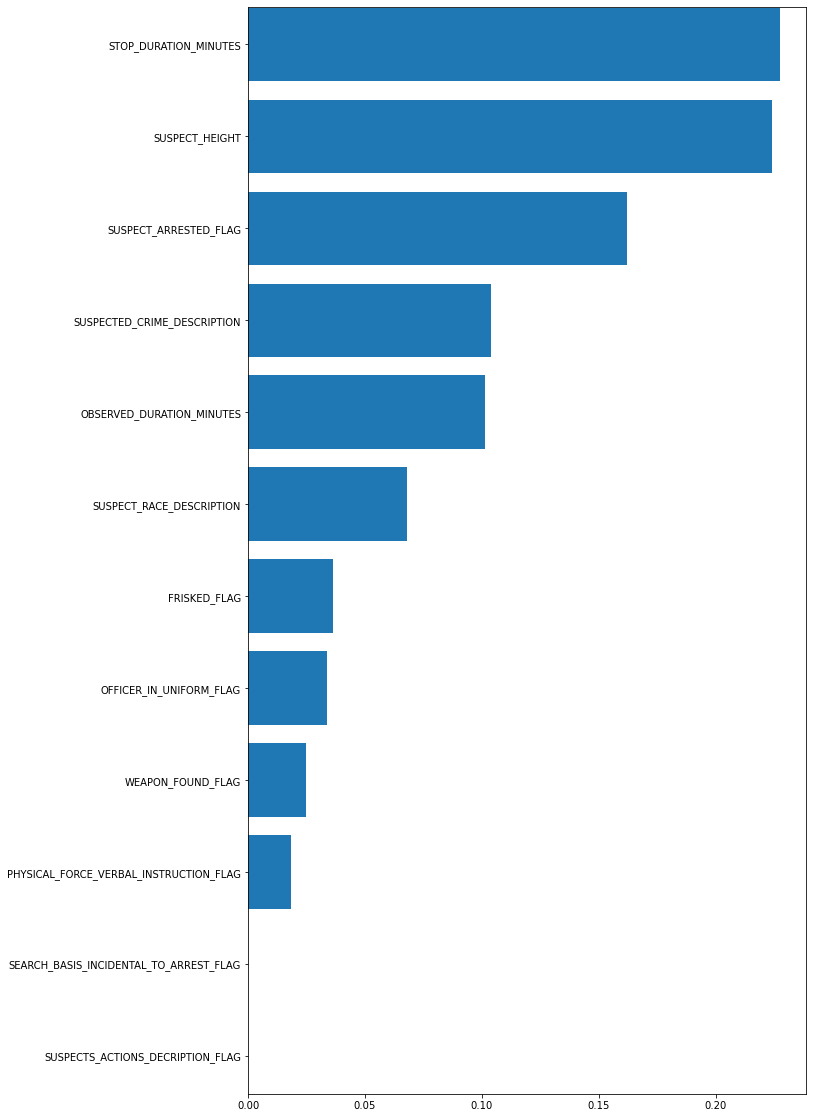

In [167]:
features = sorted(zip(X_merge.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [168]:
features

[('SUSPECTS_ACTIONS_DECRIPTION_FLAG', 0.0),
 ('SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 0.0),
 ('PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG', 0.01819433433972325),
 ('WEAPON_FOUND_FLAG', 0.024750255690888977),
 ('OFFICER_IN_UNIFORM_FLAG', 0.033852842335814905),
 ('FRISKED_FLAG', 0.03622990378778301),
 ('SUSPECT_RACE_DESCRIPTION', 0.06803070922476621),
 ('OBSERVED_DURATION_MINUTES', 0.10127287009230515),
 ('SUSPECTED_CRIME_DESCRIPTION', 0.1038375229476402),
 ('SUSPECT_ARRESTED_FLAG', 0.16219546750211036),
 ('SUSPECT_HEIGHT', 0.22425161414056874),
 ('STOP_DURATION_MINUTES', 0.2273844799383993)]

In [169]:
selected_cols = [f[0] for f in features][-12:]
selected_cols

['SUSPECTS_ACTIONS_DECRIPTION_FLAG',
 'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
 'WEAPON_FOUND_FLAG',
 'OFFICER_IN_UNIFORM_FLAG',
 'FRISKED_FLAG',
 'SUSPECT_RACE_DESCRIPTION',
 'OBSERVED_DURATION_MINUTES',
 'SUSPECTED_CRIME_DESCRIPTION',
 'SUSPECT_ARRESTED_FLAG',
 'SUSPECT_HEIGHT',
 'STOP_DURATION_MINUTES']

In [170]:
['OBSERVED_DURATION_MINUTES',
 'OFFICER_IN_UNIFORM_FLAG',
 'FRISKED_FLAG',
 'SUSPECT_ARRESTED_FLAG',
 'SUSPECTED_CRIME_DESCRIPTION',
 'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
 'STOP_DURATION_MINUTES',
 'SUSPECT_HEIGHT',
 'SUSPECT_RACE_DESCRIPTION',
 'WEAPON_FOUND_FLAG',
 'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG']

['OBSERVED_DURATION_MINUTES',
 'OFFICER_IN_UNIFORM_FLAG',
 'FRISKED_FLAG',
 'SUSPECT_ARRESTED_FLAG',
 'SUSPECTED_CRIME_DESCRIPTION',
 'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
 'STOP_DURATION_MINUTES',
 'SUSPECT_HEIGHT',
 'SUSPECT_RACE_DESCRIPTION',
 'WEAPON_FOUND_FLAG',
 'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG',
 'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG']

In [171]:
import joblib
joblib.dump(clf, 'reduced_features_random_forest.joblib')

['reduced_features_random_forest.joblib']